In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('spaceship_titanic_dataset.csv')

# New Section

In [ ]:
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (8878, 14)

Data Types:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin', 'Name']
target = 'Transported'

In [ ]:
print(f"\nNumerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")


Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Categorical Columns: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin', 'Name']


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 959.3+ KB


In [ ]:
print((df == 0).sum())

PassengerId        0
HomePlanet         0
CryoSleep       5439
Cabin              0
Destination        0
Age              178
VIP             8291
RoomService     5577
FoodCourt       5456
ShoppingMall    5587
Spa             5324
VRDeck          5495
Name               0
Transported     4315
dtype: int64


In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
print(df.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [ ]:
#TO DRAW
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['TotalSpend'] = df[spending_cols].sum(axis=1)
df['LogTotalSpend'] = np.log1p(df['TotalSpend'])  #log1p علشان لو total بي 0
cols_to_check = numerical_cols

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [ ]:
expense_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in expense_cols:
    df[col] = df[col].fillna(0)

In [ ]:
df.loc[df[expense_cols].sum(axis=1) > 0, 'CryoSleep'] = df.loc[df[expense_cols].sum(axis=1) > 0, 'CryoSleep'].fillna(False)

/tmp/ipython-input-2737424403.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df[expense_cols].sum(axis=1) > 0, 'CryoSleep'] = df.loc[df[expense_cols].sum(axis=1) > 0, 'CryoSleep'].fillna(False)


In [ ]:
df['CryoSleep'].mode()[0]

False

In [ ]:
df['CryoSleep'] = df['CryoSleep'].fillna(True)

/tmp/ipython-input-3865773209.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(True)


In [ ]:
categorical_cols = ['HomePlanet', 'Destination', 'VIP', 'Cabin']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

/tmp/ipython-input-3447108566.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df['Name'] = df['Name'].fillna("unknown")

In [ ]:
print(df.isnull().sum())

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
Transported      0
TotalSpend       0
LogTotalSpend    0
dtype: int64


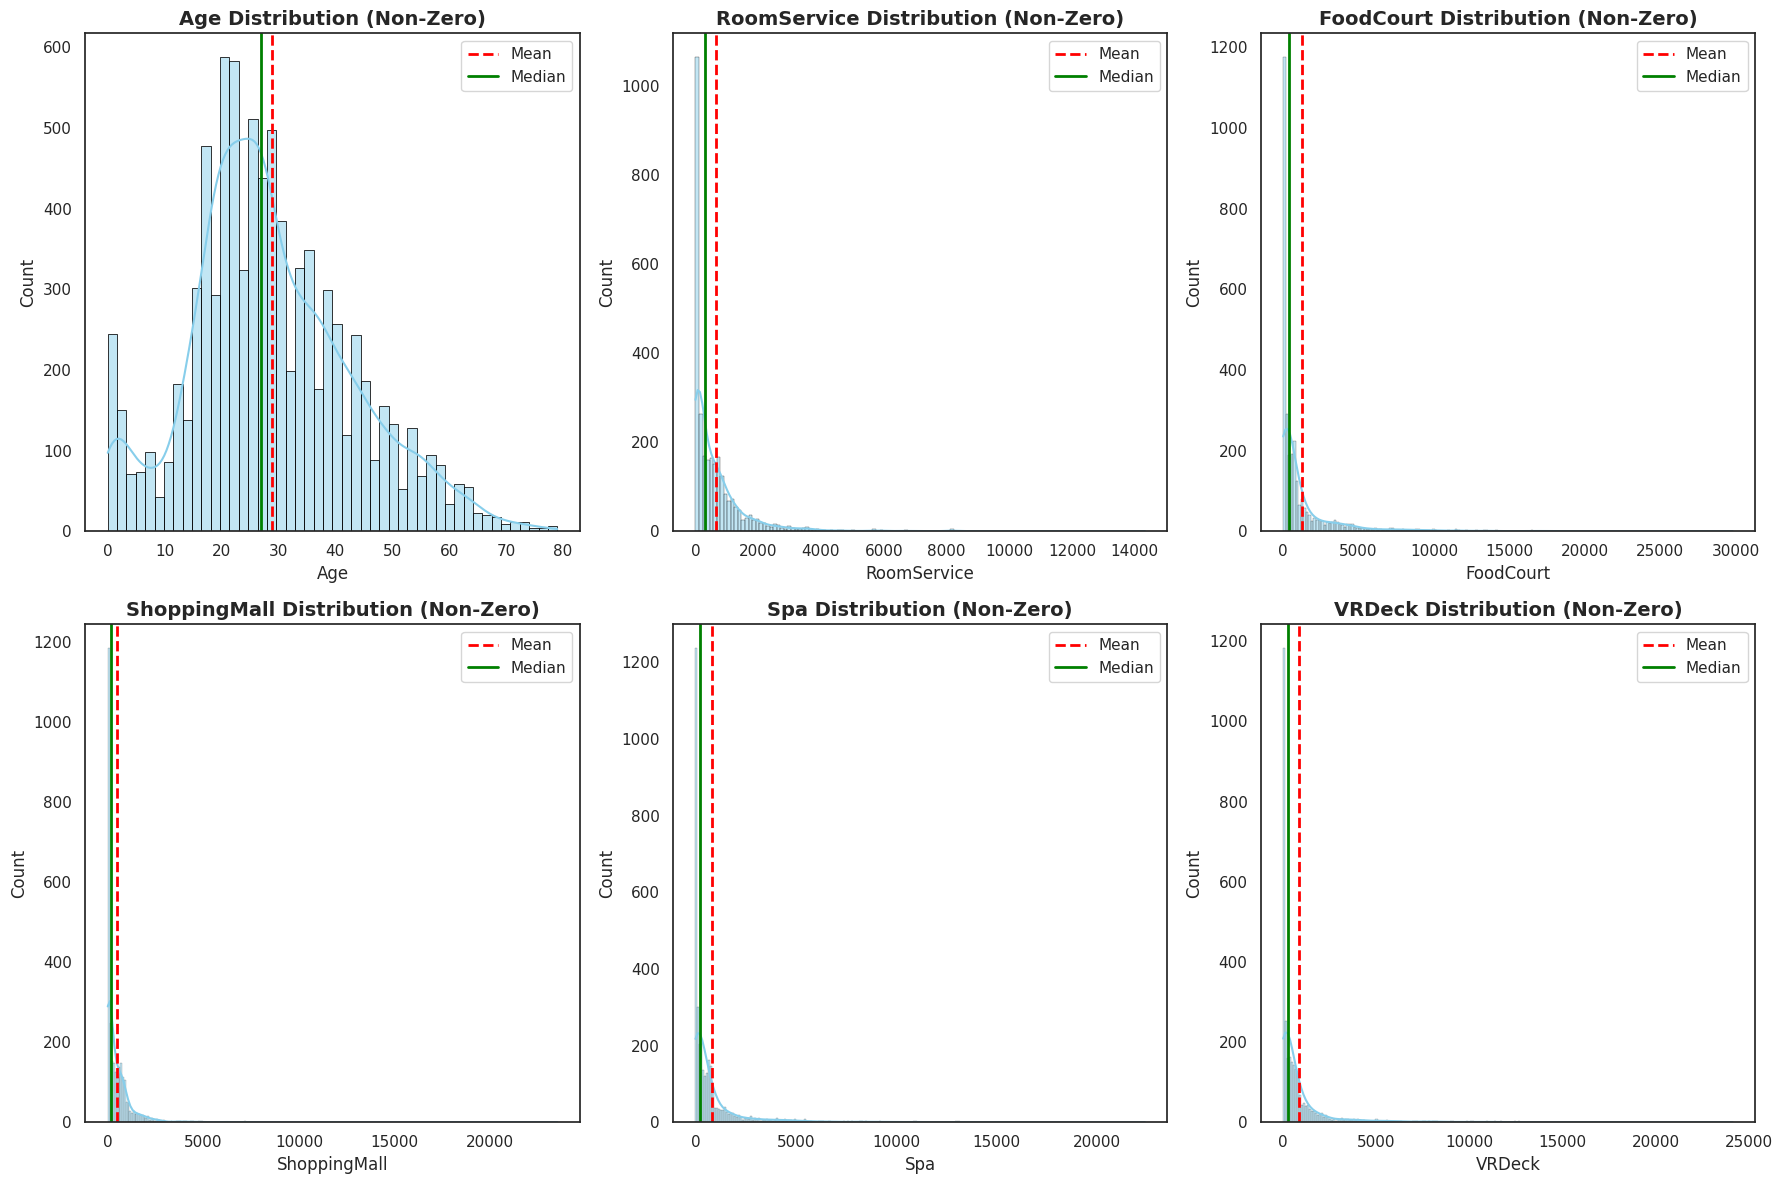

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(cols_to_check):
    plt.subplot(2, 3, i+1)

    # Filter out zero values to visualize the distribution of actual spenders
    # If the column is 'Age', we take all non-null values
    if col in spending_cols:
        data_to_plot = df[df[col] > 0][col]
    else:
        data_to_plot = df[col].dropna()

    # Handle case where a column might be empty after filtering
    if len(data_to_plot) == 0: data_to_plot = df[col]

    sns.histplot(data_to_plot, kde=True, color='skyblue', edgecolor='black')

    # Add vertical lines for Mean and Median
    plt.axvline(data_to_plot.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    plt.axvline(data_to_plot.median(), color='green', linestyle='-', linewidth=2, label='Median')

    plt.title(f'{col} Distribution (Non-Zero)', fontsize=14, fontweight='bold')
    plt.legend()

plt.tight_layout()
plt.show()

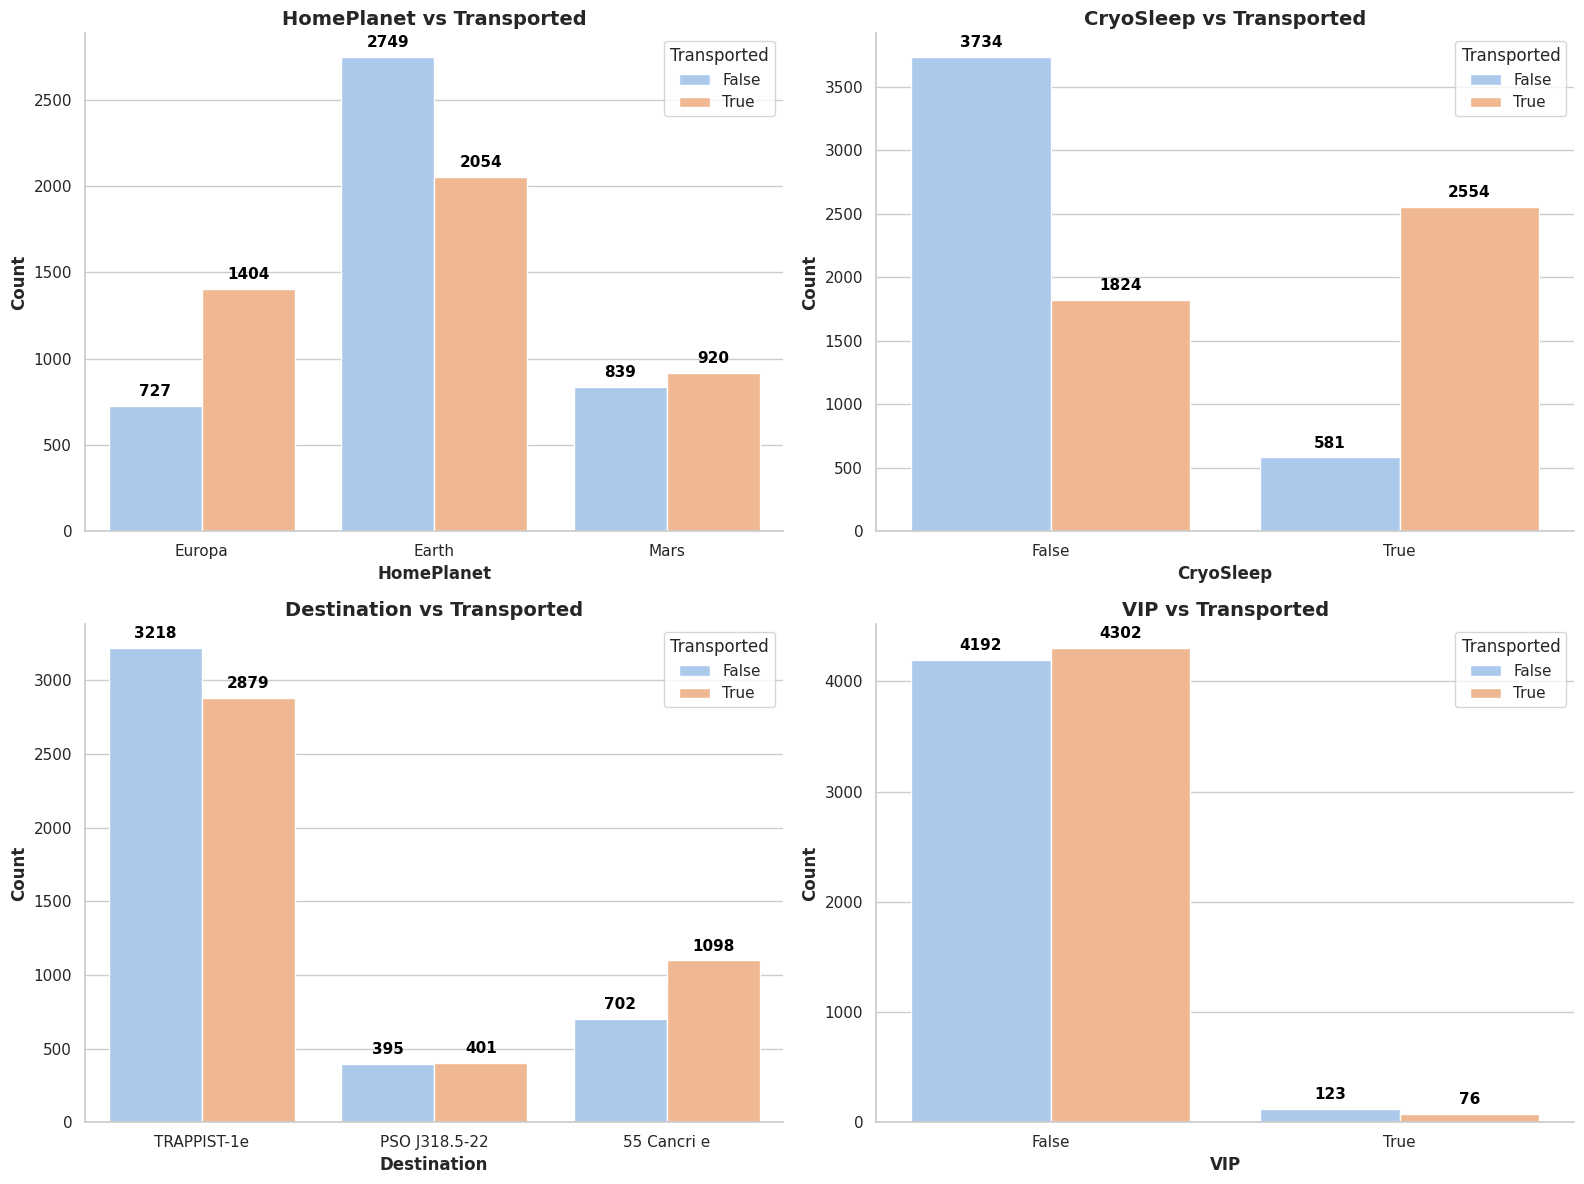

In [ ]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

cols_to_plot = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

axes_flat = axes.flatten()

for i, col in enumerate(cols_to_plot):

    ax = axes_flat[i]


    sns.countplot(x=col, hue='Transported', data=df, ax=ax, palette='pastel')


    ax.set_title(f'{col} vs Transported', fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')


    sns.despine(ax=ax)

    for p in ax.patches:
        height = p.get_height()

        if height > 0:
             ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        xytext=(0, 5), textcoords='offset points',
                        fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

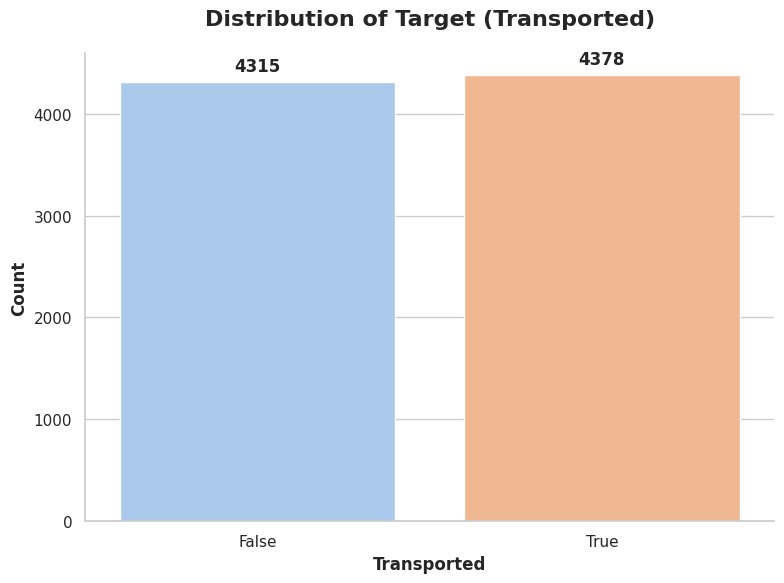

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Transported', data=df, palette='pastel', hue='Transported' , legend=False)
# Add count annotations on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.title("Distribution of Target (Transported)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Transported", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()

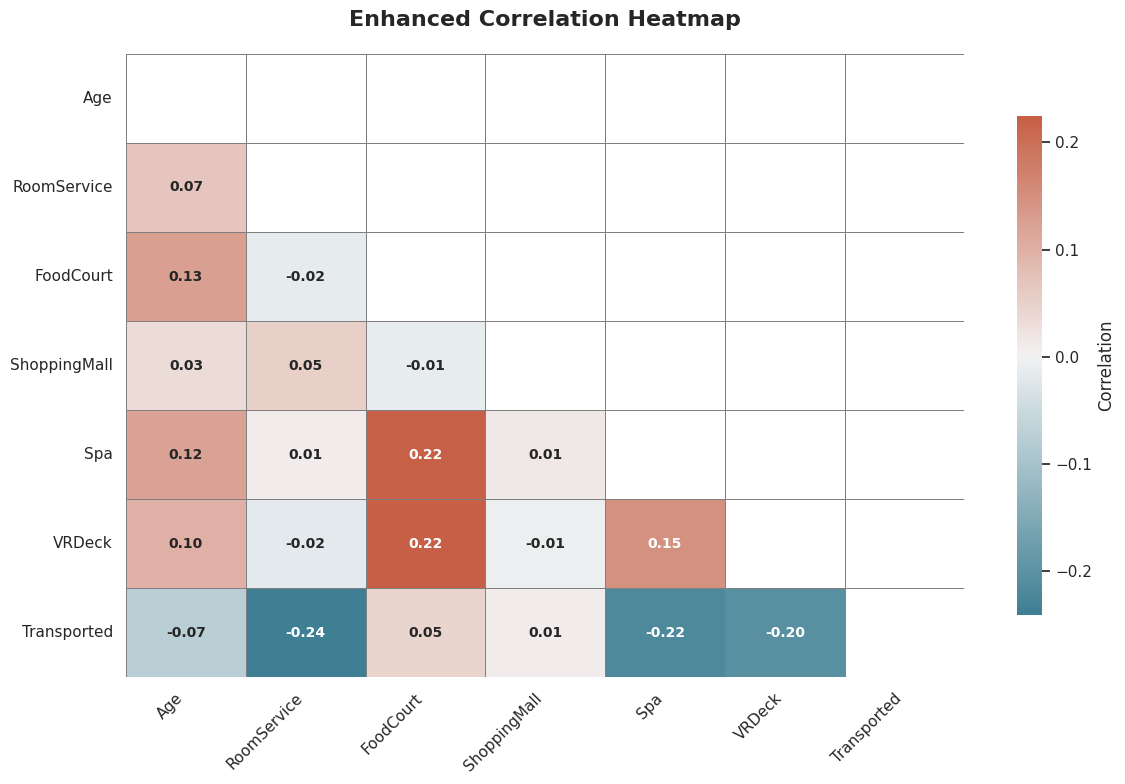

In [ ]:
plt.figure(figsize=(12, 8))

# Prepare numeric dataframe including Target
df_numeric = df[cols_to_check].copy()
df_numeric['Transported'] = df['Transported'].astype(int)

# Compute correlation
corr = df_numeric.corr()

# Set theme
sns.set_theme(style="white")

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Heatmap
ax = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size":10, "weight":"bold"},
    cbar_kws={"shrink":0.8, "label":"Correlation"}
)

# Highlight strong correlations (|corr| >= 0.7)
for i in range(len(corr)):
    for j in range(len(corr)):
        if i <= j:
            continue
        if abs(corr.iloc[i, j]) >= 0.7:
            ax.add_patch(
                plt.Rectangle(
                    (j, i), 1, 1,
                    fill=False,
                    edgecolor='gold',
                    lw=3
                )
            )

# Improve ticks
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Title
plt.title("Enhanced Correlation Heatmap", fontsize=16, fontweight='bold', pad=20)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


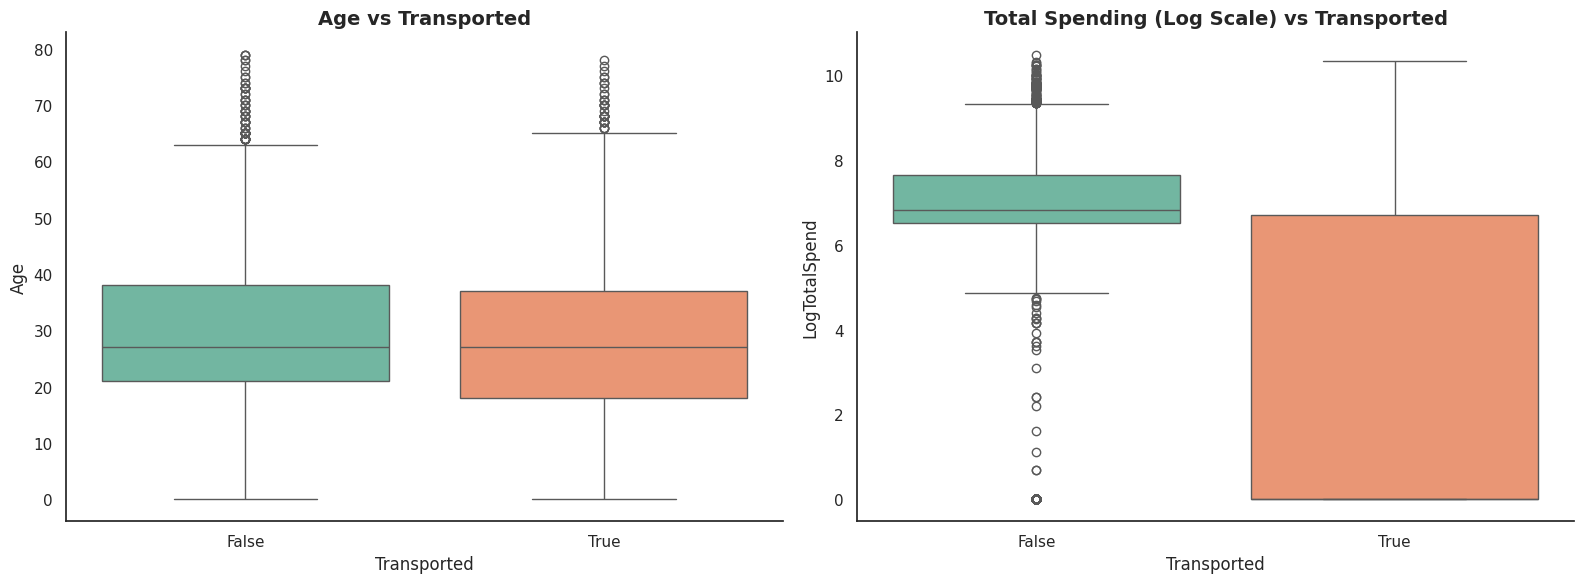

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='Transported', y='Age', data=df, ax=axes[0], palette='Set2',hue='Transported',legend=False )
axes[0].set_title('Age vs Transported', fontsize=14, fontweight='bold')

sns.boxplot(x='Transported', y='LogTotalSpend', data=df, ax=axes[1], palette='Set2',hue='Transported',legend=False)
axes[1].set_title('Total Spending (Log Scale) vs Transported', fontsize=14, fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# Check if Age 0 passengers are VIP (illogical) or have high spending (unlikely for babies)
babies = df[df['Age'] == 0]
print("\nStats for passengers with Age == 0:")
print(babies[['VIP', 'TotalSpend', 'CryoSleep', 'HomePlanet']].describe(include='all'))
print(f"\nAre there any VIP babies? {babies['VIP'].sum()}")
print(f"Max spending by a baby: {babies['TotalSpend'].max()}")


Stats for passengers with Age == 0:
          VIP  TotalSpend CryoSleep HomePlanet
count     178       178.0       178        178
unique      1         NaN         2          3
top     False         NaN     False      Earth
freq      178         NaN       104        127
mean      NaN         0.0       NaN        NaN
std       NaN         0.0       NaN        NaN
min       NaN         0.0       NaN        NaN
25%       NaN         0.0       NaN        NaN
50%       NaN         0.0       NaN        NaN
75%       NaN         0.0       NaN        NaN
max       NaN         0.0       NaN        NaN

Are there any VIP babies? 0
Max spending by a baby: 0.0


In [ ]:
df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0])

In [ ]:
df.sample()
print(df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpend', 'LogTotalSpend', 'Deck',
       'Cabin_num', 'Side', 'Group'],
      dtype='object')


In [ ]:
# Calculate Group Size
group_sizes = df['Group'].value_counts().to_dict()
df['GroupSize'] = df['Group'].map(group_sizes)

# 3. Create a feature 'IsSolo' (True if GroupSize == 1)
df['IsSolo'] = (df['GroupSize'] == 1).astype(int)

In [ ]:
df_model = df.copy()
cols_to_drop = ['PassengerId', 'Name', 'Cabin', 'Group', 'Cabin_num'] # Cabin_num can be messy, let's drop for simplicity or convert to int if clean
df_model = df_model.drop(columns=cols_to_drop)

In [ ]:
print(df_model.columns)

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'TotalSpend', 'LogTotalSpend', 'Deck', 'Side', 'GroupSize', 'IsSolo'],
      dtype='object')


In [ ]:
df_model['Transported'] = df_model['Transported'].astype(int)
df_model['CryoSleep'] = df_model['CryoSleep'].astype(int)
df_model['VIP'] = df_model['VIP'].astype(int)

In [ ]:
df_model = pd.get_dummies(df_model, columns=['HomePlanet', 'Destination', 'Deck', 'Side'])

In [ ]:
df_model.sample(5)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   TotalSpend                 8693 non-null   float64
 10  LogTotalSpend              8693 non-null   float64
 11  GroupSize                  8693 non-null   int64  
 12  IsSolo                     8693 non-null   int64  
 13  HomePlanet_Earth           8693 non-null   bool   
 1

In [ ]:
def evaluate_and_check_fitting(model, X_train, y_train, X_test, y_test, model_name, is_keras=False):
    print(f"\n{'='*20} Evaluation: {model_name} {'='*20}")


    if is_keras:
        y_train_prob = model.predict(X_train, verbose=0)
        y_test_prob = model.predict(X_test, verbose=0)
        y_train_pred = (y_train_prob > 0.5).astype(int).flatten()
        y_test_pred = (y_test_prob > 0.5).astype(int).flatten()
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)


    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)

    print(f"🔹 Training Accuracy: {train_acc:.4f}")
    print(f"🔹 Testing Accuracy:  {test_acc:.4f}")
    print(f"🔹 Precision:         {precision:.4f}")
    print(f"🔹 Recall:            {recall:.4f}")

    print("\n📝 Confusion Matrix:")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)

    print("\n🧐 Model Status:")
    if train_acc - test_acc > 0.05:
        print("❌ OVERFITTING (Training score is much higher than Testing score)")
    elif train_acc < 0.70:
        print("⚠️ UNDERFITTING (Model is not learning well)")
    else:
        print("✅ RIGHT-FITTING (Good balance between Train and Test)")

    return test_acc

In [ ]:
cluster_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend', 'Age']
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_model[cluster_features])

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # 4 Clusters seems reasonable (e.g., No spend, Low, Med, High)
df_model['Cluster'] = kmeans.fit_predict(X_cluster)
df['Cluster'] = df_model['Cluster'] # Add to original df for the user

In [ ]:
X = df_model.drop('Transported', axis=1)
y = df_model['Transported']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler_model = StandardScaler()
X_train_scaled = scaler_model.fit_transform(X_train)
X_test_scaled = scaler_model.transform(X_test)

results = {}

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

acc_lr = evaluate_and_check_fitting(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")
results['Logistic Regression'] = acc_lr


==================== Evaluation: Logistic Regression ====================
🔹 Training Accuracy: 0.7911
🔹 Testing Accuracy:  0.7913
🔹 Precision:         0.7860
🔹 Recall:            0.8048

📝 Confusion Matrix:
[[671 192]
 [171 705]]

🧐 Model Status:
✅ RIGHT-FITTING (Good balance between Train and Test)


In [ ]:
# # ========================================================
# # 3. K-Nearest Neighbors (KNN) with Tuning
# # ========================================================
# print("\n--- 2. KNN (Finding Best K) ---")

# k_values = range(1, 31)
# knn_accuracies = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_scaled, y_train)
#     knn_accuracies.append(knn.score(X_test_scaled, y_test))

# best_k = k_values[np.argmax(knn_accuracies)]
# print(f"🌟 Best K value found: {best_k} (Accuracy: {max(knn_accuracies):.4f})")



k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"🌟 Best K selected based on CV: {best_k}")

🌟 Best K selected based on CV: 22


In [ ]:
# plt.figure(figsize=(8, 4))
# plt.plot(k_values, knn_accuracies, marker='o', color='green')
# plt.title(f'KNN Accuracy vs. K Value (Best: {best_k})')
# plt.xlabel('Number of Neighbors (K)')
# plt.ylabel('Accuracy')
# plt.grid(True)
# plt.show()

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)


acc_knn = evaluate_and_check_fitting(best_knn, X_train_scaled, y_train, X_test_scaled, y_test, f"KNN (K={best_k})")
results[f'KNN'] = acc_knn




==================== Evaluation: KNN (K=22) ====================
🔹 Training Accuracy: 0.7934
🔹 Testing Accuracy:  0.7844
🔹 Precision:         0.8127
🔹 Recall:            0.7432

📝 Confusion Matrix:
[[713 150]
 [225 651]]

🧐 Model Status:
✅ RIGHT-FITTING (Good balance between Train and Test)


In [ ]:
print("\n🧠 Tuning Neural Network (Grid Search)...")

param_grid = {
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

best_nn_acc = 0
best_nn_model = None

for epochs in param_grid['epochs']:
    for batch in param_grid['batch_size']:

        model = keras.Sequential([
            keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid') # Binary Classification output
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


        model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch, verbose=0)


        loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)

        if acc > best_nn_acc:
            best_nn_acc = acc
            best_nn_model = model

print("🌟 Best NN Trained.")
acc_nn = evaluate_and_check_fitting(best_nn_model, X_train_scaled, y_train, X_test_scaled, y_test, "Neural Network", is_keras=True)
results['Neural Network'] = acc_nn


🧠 Tuning Neural Network (Grid Search)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🌟 Best NN Trained.

==================== Evaluation: Neural Network ====================
🔹 Training Accuracy: 0.8259
🔹 Testing Accuracy:  0.8114
🔹 Precision:         0.8157
🔹 Recall:            0.8082

📝 Confusion Matrix:
[[703 160]
 [168 708]]

🧐 Model Status:
✅ RIGHT-FITTING (Good balance between Train and Test)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
acc_rf = evaluate_and_check_fitting(rf_model, X_train, y_train, X_test, y_test, "Random Forest (Bonus)")
results['Random Forest'] = acc_rf


==================== Evaluation: Random Forest (Bonus) ====================
🔹 Training Accuracy: 0.9640
🔹 Testing Accuracy:  0.7982
🔹 Precision:         0.8197
🔹 Recall:            0.7683

📝 Confusion Matrix:
[[715 148]
 [203 673]]

🧐 Model Status:
❌ OVERFITTING (Training score is much higher than Testing score)


In [ ]:
from sklearn.metrics import f1_score

# ========================================================
# 7. FINAL COMPARISON TABLE (جدول المقارنة)
# ========================================================
print("\n📊 Generating Final Comparison Table...")

# قائمة هنخزن فيها النتايج
comparison_list = []

# دالة صغيرة عشان نحسب كل الأرقام لموديل معين ونضيفها للقائمة
def get_metrics(model, X_test, y_test, model_name, is_keras=False):
    # 1. التوقع
    if is_keras:
        y_prob = model.predict(X_test, verbose=0)
        y_pred = (y_prob > 0.5).astype(int).flatten()
    else:
        y_pred = model.predict(X_test)

    # 2. حساب الأرقام
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 3. إرجاع النتيجة كقاموس (Dictionary)
    return {
        'Model': model_name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4)
    }

# --- تجميع البيانات من الموديلات اللي دربناها فوق ---
# (تأكد إن المتغيرات دي موجودة من الخلايا اللي فاتت: lr_model, best_knn, best_nn_model, rf_model)

# 1. Logistic Regression
comparison_list.append(get_metrics(lr_model, X_test_scaled, y_test, 'Logistic Regression'))

# 2. KNN (Best K)
comparison_list.append(get_metrics(best_knn, X_test_scaled, y_test, f'KNN (K={best_k})'))

# 3. Neural Network
comparison_list.append(get_metrics(best_nn_model, X_test_scaled, y_test, 'Neural Network', is_keras=True))

# 4. Random Forest (Bonus)
# لاحظ: الراندوم فورست كان متدرب على X_test العادية مش Scaled، بس مش هتفرق كتير لو دخلنا Scaled للراندوم فورست
# لكن للأمان، يفضل نستخدم X_test الأصلية لو متاحة، أو Scaled مش هيضر الراندوم فورست
comparison_list.append(get_metrics(rf_model, X_test, y_test, 'Random Forest'))

# --- تحويل القائمة لجدول وعرضه ---
comparison_df = pd.DataFrame(comparison_list)

# ترتيب الجدول حسب الدقة (الأعلى فالأقل)
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# عرض الجدول
print("\n🏆 Final Models Leaderboard:")
print(comparison_df.to_markdown(index=False)) # شكل جدول منسق


📊 Generating Final Comparison Table...

🏆 Final Models Leaderboard:
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| Neural Network      |     0.8114 |      0.8157 |   0.8082 |     0.8119 |
| Random Forest       |     0.7982 |      0.8197 |   0.7683 |     0.7932 |
| Logistic Regression |     0.7913 |      0.786  |   0.8048 |     0.7953 |
| KNN (K=22)          |     0.7844 |      0.8127 |   0.7432 |     0.7764 |


In [ ]:
winner_name = max(results, key=results.get)
print(f"\n🏆 The Winner is: {winner_name} with Accuracy: {results[winner_name]:.4f}")


🏆 The Winner is: Neural Network with Accuracy: 0.8114


/tmp/ipython-input-1112558547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')


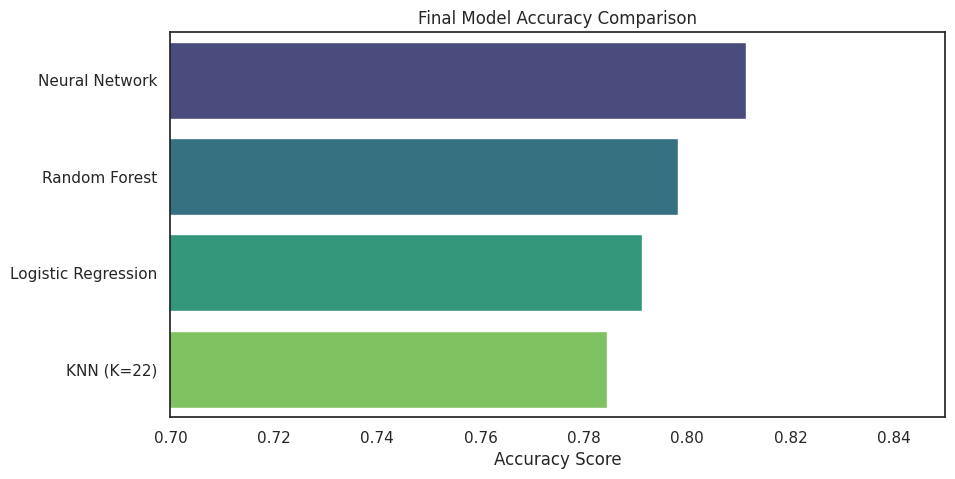

In [ ]:
plt.figure(figsize=(10, 5))
# بنرسم الدقة بس للمقارنة السريعة
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')
plt.xlim(0.7, 0.85) # تركيز الزووم على الفروقات
plt.title('Final Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('')
plt.show()

In [ ]:
print("🚀 Training XGBoost Model...")
xgb_model = XGBClassifier(
    n_estimators=500,       # عدد الأشجار
    learning_rate=0.05,     # سرعة التعلم
    max_depth=6,            # عمق الشجرة (عشان يلقط تفاصيل أكتر)
    n_jobs=-1,              # استخدام كل قوة البروسيسور
    random_state=42
)

# 2. التدريب (هنستخدم Scaled Data عشان نضمن أفضل أداء)
xgb_model.fit(X_train_scaled, y_train)

# 3. التوقع والتقييم
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

# 4. عرض النتائج
print(f"\n📊 XGBoost Accuracy: {xgb_acc:.4f}")
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred_xgb))

🚀 Training XGBoost Model...

📊 XGBoost Accuracy: 0.8125

📝 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       863
           1       0.81      0.82      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [ ]:
import joblib


model_to_save = xgb_model
# model_to_save = rf_model
# model_to_save = best_knn
# model_to_save = lr_model


if 'model_to_save' not in locals():
    print("⚠️ من فضلك اختر موديل أولاً (شيل علامة # من السطر المناسب فوق)")
else:
    print(f"💾 Saving the selected model...")

    # 1. حفظ الموديل الفائز
    joblib.dump(model_to_save, 'model.pkl')

    # 2. حفظ الـ Scaler (مهم جداً للموقع عشان يوحد الأرقام)
    # ملحوظة: حتى لو اخترت Random Forest، حفظ الـ Scaler مش هيضر وهيخلي كود الموقع موحد
    joblib.dump(scaler_model, 'scaler_model.pkl')

    # 3. حفظ ملفات الـ Clustering (دي ثابتة مش بتتغير مع تغيير الموديل)
    joblib.dump(kmeans, 'cluster_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')

    # 4. حفظ أسماء الأعمدة (عشان الترتيب)
    model_columns = list(X.columns)
    joblib.dump(model_columns, 'model_columns.pkl')

    print("✅ Done! Files ready for Streamlit: model.pkl, scalers, etc.")

💾 Saving the selected model...
✅ Done! Files ready for Streamlit: model.pkl, scalers, etc.


In [ ]:
# # --- 4. Prepare Output File for User ---
# # User wants: PassengerId, Cluster, Prediction, Probability
# df['Prediction'] = clf.predict(X) # Predict for everyone
# df['Probability'] = clf.predict_proba(X)[:, 1] # Probability of being Transported (True)

In [ ]:
# df[['PassengerId', 'Cluster', 'Prediction', 'Probability']]

In [ ]:
# # 4. (الخطوة اللي إنت محتاجها) حفظ الملفات
# joblib.dump(clf, 'model.pkl')
# joblib.dump(kmeans, 'cluster_model.pkl')


In [ ]:
# joblib.dump(scaler, 'scaler.pkl')

In [ ]:

test_df = pd.read_csv('test.csv')
passenger_ids = test_df['PassengerId']
test_df['Cabin'] = test_df['Cabin'].fillna("F/0/S")
test_df[['Deck', 'Cabin_num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)


test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0])

group_sizes = test_df['Group'].value_counts().to_dict()
test_df['GroupSize'] = test_df['Group'].map(group_sizes)

test_df['IsSolo'] = (test_df['GroupSize'] == 1).astype(int)

spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in spending_cols:
    test_df[col] = test_df[col].fillna(0)

test_df['TotalSpend'] = test_df[spending_cols].sum(axis=1)
test_df['LogTotalSpend'] = np.log1p(test_df['TotalSpend'])

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())


test_df.loc[test_df['TotalSpend'] > 0, 'CryoSleep'] = False
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(True).astype(bool)


categorical_cols = ['HomePlanet', 'Destination', 'VIP'] # شلنا Cabin خلاص
for col in categorical_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])


cols_to_drop = ['PassengerId', 'Name', 'Cabin', 'Group', 'Cabin_num']

test_processed = test_df.drop(columns=cols_to_drop, errors='ignore')


test_processed = pd.get_dummies(test_processed)


final_test_X = test_processed.reindex(columns=X.columns, fill_value=0)

print("🤖 Predicting...")

X_submission_scaled = scaler_model.transform(final_test_X)

y_pred_prob = best_nn_model.predict(X_submission_scaled)
y_pred_bool = (y_pred_prob >= 0.5).flatten()

submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': y_pred_bool
})

submission.to_csv('submission.csv', index=False)
print("✅ Done! File 'submission.csv' is ready.")

🤖 Predicting...
 29/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/tmp/ipython-input-3943496438.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['CryoSleep'] = test_df['CryoSleep'].fillna(True).astype(bool)
/tmp/ipython-input-3943496438.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna(test_df[col].mode()[0])


134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
✅ Done! File 'submission.csv' is ready.


In [ ]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=-1)

# 2. درب
print("🚀 Training XGBoost...")
xgb_model.fit(X_train_scaled, y_train)

# 3. شوف السكور
score_xgb = xgb_model.score(X_test_scaled, y_test)
print(f"📊 XGBoost Accuracy: {score_xgb:.4f}")

# 4. توقع
# XGBoost بيحب الارقام، فالنتيجة هتكون 0 و 1، لازم نحولها True/False
pred_xgb = xgb_model.predict(X_submission_scaled)
pred_xgb_bool = [True if x == 1 else False for x in pred_xgb]

# 5. حفظ
submission_xgb = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': pred_xgb_bool
})
submission_xgb.to_csv('submission_xgb.csv', index=False)
print("✅ Saved: submission_xgb.csv")

🚀 Training XGBoost...
📊 XGBoost Accuracy: 0.8125
✅ Saved: submission_xgb.csv
